In [3]:
pip install pandas numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import pandas for data manipulation and analysis
import pandas as pd

# Import NumPy for numerical computations
import numpy as np

# Import Matplotlib and Seaborn for data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Import Scikit-learn for machine learning
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings

In [8]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [10]:
# Load the Housing.csv dataset
def load_dataset(file_path):
    try:
        # Attempt to load the dataset
        dataset = pd.read_csv(file_path)
        return dataset
    except FileNotFoundError:
        print("File not found. Please check the file path.")
        return None
    except pd.errors.EmptyDataError:
        print("File is empty. Please check the file contents.")
        return None
    except pd.errors.ParserError:
        print("Error parsing the file. Please check the file format.")
        return None

# Specify the file path to the dataset
file_path = 'Housing.csv'

# Load the dataset
housing_data = load_dataset(file_path)

# Display the first few rows of the dataset
print(housing_data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7229300521  20141013T000000  231300.0         2       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [12]:
# Define the columns to drop (use actual column names)
columns_to_drop = ['id', 'date', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Drop the columns
housing_data = housing_data.drop(columns_to_drop, axis=1, errors='ignore')

# Check for missing values
print(housing_data.isnull().sum())

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
yr_built       0
zipcode        0
dtype: int64


In [14]:
housing_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,3.409430,1971.005136,98077.939805
std,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.650743,29.373411,53.505026
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,1900.000000,98001.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,3.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,4.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,2015.000000,98199.000000


In [24]:
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
0,231300.0,2,1.00,1180,5650,1.0,3,1955,98178
1,538000.0,3,2.25,2570,7242,2.0,3,1951,98125
2,180000.0,2,1.00,770,10000,1.0,3,1933,98028
3,604000.0,4,3.00,1960,5000,1.0,5,1965,98136
4,510000.0,3,2.00,1680,8080,1.0,3,1987,98074


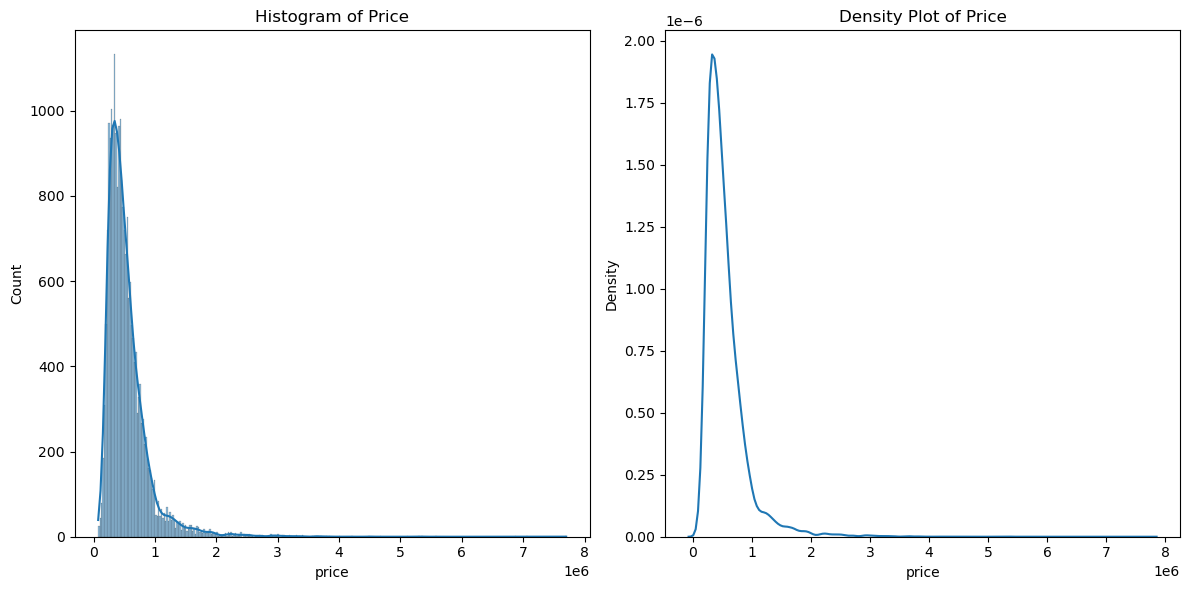

In [26]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create a histogram of the 'price' distribution
sns.histplot(housing_data['price'], ax=axs[0], kde=True)

# Set the title for the histogram
axs[0].set_title('Histogram of Price')

# Create a density plot of the 'price' distribution
sns.kdeplot(housing_data['price'], ax=axs[1])

# Set the title for the density plot
axs[1].set_title('Density Plot of Price')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

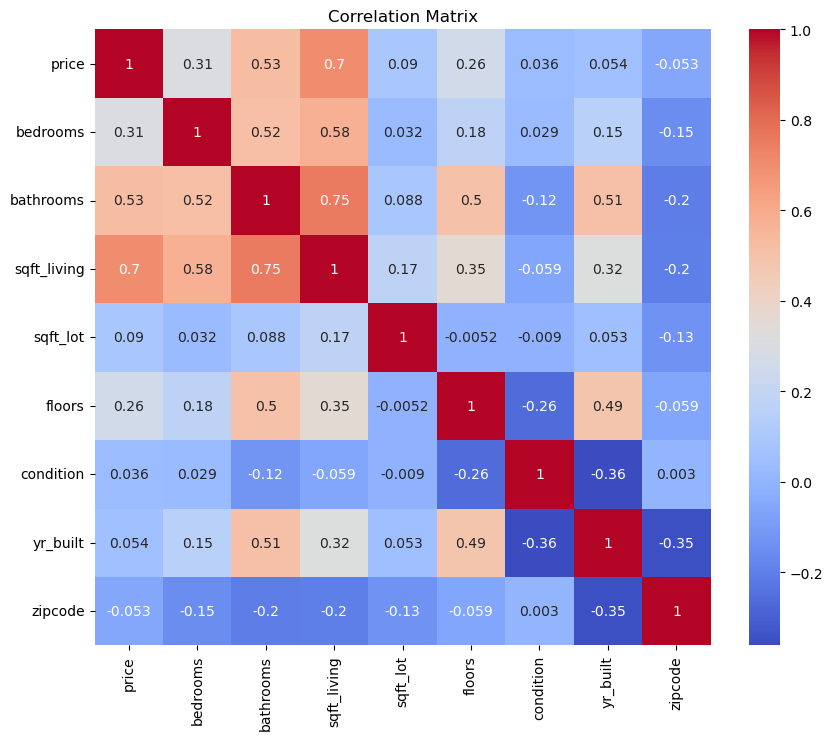

In [28]:
# Calculate the correlation matrix
corr_matrix = housing_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

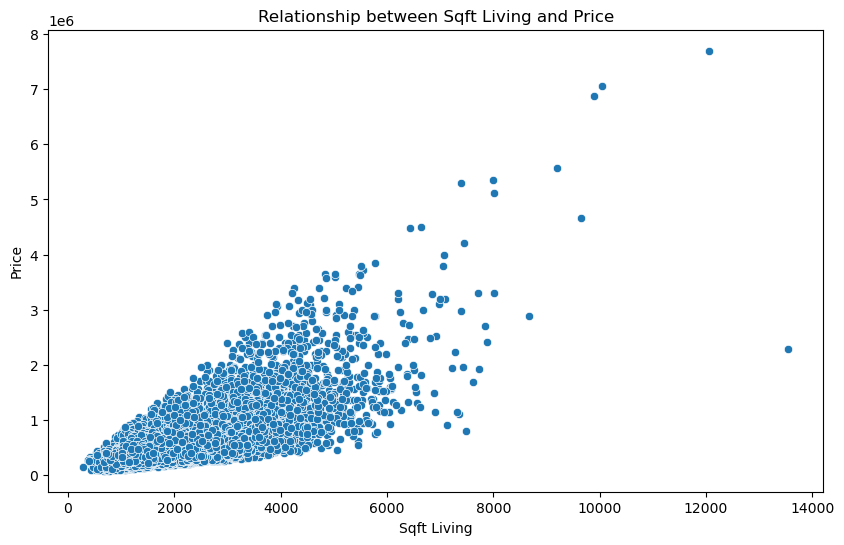

In [30]:
# Create a scatter plot of sqft_living vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=housing_data)

# Set title and labels
plt.title('Relationship between Sqft Living and Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')

# Show the plot
plt.show()

In [21]:
# Define the feature (X) and target (y) variables
X = housing_data[['sqft_living']]
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Use the model to make predictions
def predict_price(sqft_living):
    prediction = model.predict([[sqft_living]])
    return prediction[0]

# Test the prediction function
sqft_living = 2000
predicted_price = predict_price(sqft_living)
print(f'Predicted price for {sqft_living} sqft living area: ${predicted_price:.2f}')

Mean Absolute Error: 177801.59612284292
Mean Squared Error: 74509815694.51129
Root Mean Squared Error: 272964.8616479991
Predicted price for 2000 sqft living area: $517072.78


In [23]:
# Define the feature (X) and target (y) variables
X = housing_data[['sqft_living', 'bedrooms', 'bathrooms']]
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions using the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Use the model to make predictions
def predict_price(sqft_living, bedrooms, bathrooms):
    prediction = model.predict([[sqft_living, bedrooms, bathrooms]])
    return prediction[0]

# Test the prediction function
sqft_living = 2000
bedrooms = 4
bathrooms = 2
predicted_price = predict_price(sqft_living, bedrooms, bathrooms)
print(f'Predicted price for {sqft_living} sqft living area, {bedrooms} bedrooms, and {bathrooms} bathrooms: ${predicted_price:.2f}')

Mean Absolute Error: 174663.08638781612
Mean Squared Error: 74237760595.30751
Root Mean Squared Error: 272466.07237472245
Predicted price for 2000 sqft living area, 4 bedrooms, and 2 bathrooms: $478278.80


In [25]:
print(housing_data.corr()['price'].sort_values(ascending=False))

price          1.000000
sqft_living    0.702035
bathrooms      0.525136
bedrooms       0.308377
floors         0.256793
sqft_lot       0.089661
yr_built       0.054011
condition      0.036361
zipcode       -0.053201
Name: price, dtype: float64


In [35]:
# Define the hyperparameter space for Linear Regression
param_grid = {
    'fit_intercept': [True, False]
}

# Define the scoring metric (Mean Squared Error)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(LinearRegression(), param_grid, cv=5, scoring=scorer, n_iter=10, random_state=42)

# Perform hyperparameter tuning
X = housing_data[['sqft_living', 'bedrooms', 'bathrooms']]
y = housing_data['price']
random_search.fit(X, y)

# Print the best hyperparameters and the corresponding score (MSE)
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (MSE):", random_search.best_score_)

# Train a new Linear Regression model with the best hyperparameters
best_model = LinearRegression(**random_search.best_params_)
best_model.fit(X, y)

# Make predictions using the best model
y_pred = best_model.predict(X)

# Evaluate the best model's performance
mse = mean_squared_error(y, y_pred)
print("MSE of the best model:", mse)

Best Hyperparameters: {'fit_intercept': True}
Best Score (MSE): -66624167598.30611
MSE of the best model: 66455791035.24771


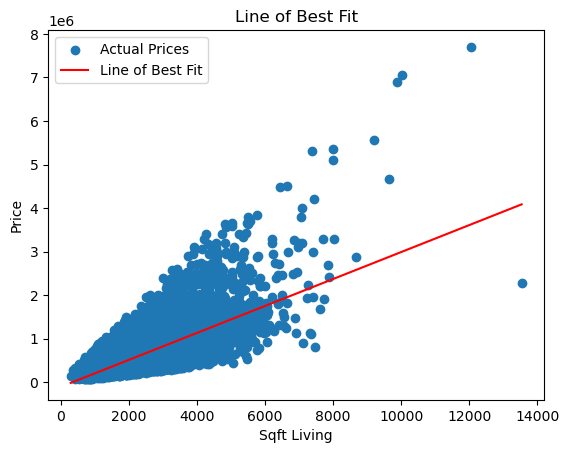

In [37]:
# Create a range of values for the 'sqft_living' feature
sqft_living_range = np.linspace(X['sqft_living'].min(), X['sqft_living'].max(), 100)

# Create a grid of values for the 'bedrooms' and 'bathrooms' features
bedrooms_grid = np.full((100,), X['bedrooms'].mean())
bathrooms_grid = np.full((100,), X['bathrooms'].mean())

# Create a new DataFrame with the grid of values
X_grid = pd.DataFrame({
    'sqft_living': sqft_living_range,
    'bedrooms': bedrooms_grid,
    'bathrooms': bathrooms_grid
})

# Make predictions using the best model
y_grid = best_model.predict(X_grid)

# Plot the line of best fit
plt.scatter(X['sqft_living'], y, label='Actual Prices')
plt.plot(sqft_living_range, y_grid, label='Line of Best Fit', color='red')
plt.xlabel('Sqft Living')
plt.ylabel('Price')
plt.title('Line of Best Fit')
plt.legend()
plt.show()

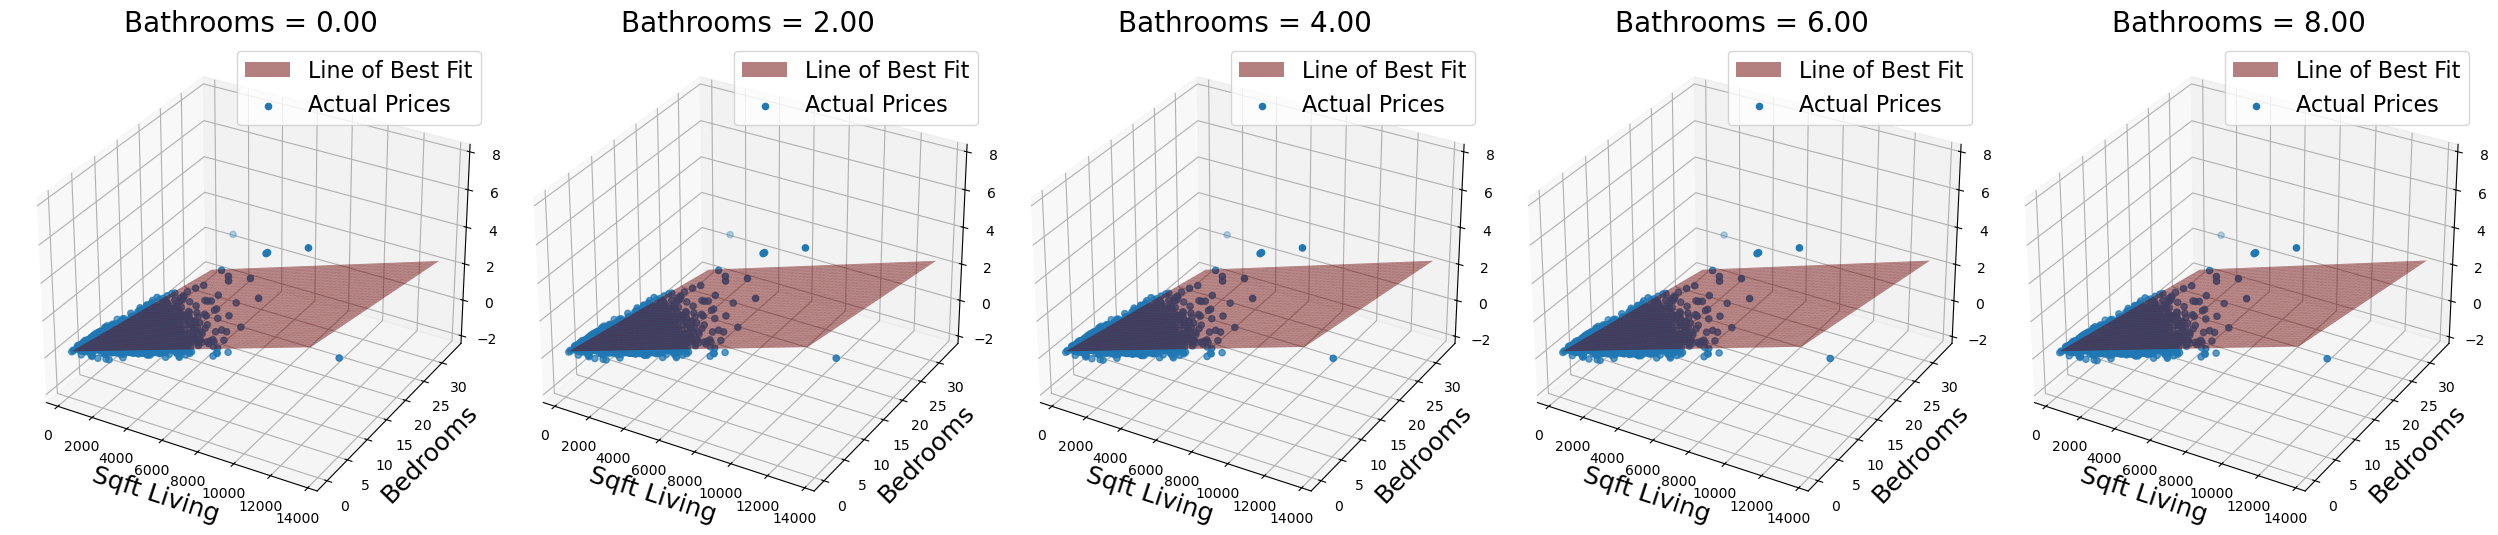

In [43]:
# Create a range of values for the 'sqft_living' feature
sqft_living_range = np.linspace(X['sqft_living'].min(), X['sqft_living'].max(), 100)

# Create a range of values for the 'bedrooms' feature
bedrooms_range = np.linspace(X['bedrooms'].min(), X['bedrooms'].max(), 100)

# Create a range of values for the 'bathrooms' feature
bathrooms_range = np.linspace(X['bathrooms'].min(), X['bathrooms'].max(), 5)

# Create a figure with multiple subplots
fig = plt.figure(figsize=(25, 15))  # Increased figure size

# Loop through each value of 'bathrooms'
for i, bathrooms in enumerate(bathrooms_range):
    # Create a grid of values for the 'sqft_living' and 'bedrooms' features
    sqft_living_grid, bedrooms_grid = np.meshgrid(sqft_living_range, bedrooms_range)

    # Create a grid of values for the 'bathrooms' feature
    bathrooms_grid = np.full(sqft_living_grid.shape, bathrooms)

    # Create a new DataFrame with the grid of values
    X_grid = pd.DataFrame({
        'sqft_living': sqft_living_grid.flatten(),
        'bedrooms': bedrooms_grid.flatten(),
        'bathrooms': bathrooms_grid.flatten()
    })

    # Make predictions using the best model
    y_grid = best_model.predict(X_grid)

    # Reshape the predicted values to match the grid shape
    y_grid = y_grid.reshape(sqft_living_grid.shape)

    # Plot the line of best fit for the current value of 'bathrooms'
    ax = fig.add_subplot(1, len(bathrooms_range), i+1, projection='3d')
    ax.plot_surface(sqft_living_grid, bedrooms_grid, y_grid, label='Line of Best Fit', color='red', alpha=0.5)
    ax.scatter(X['sqft_living'], X['bedrooms'], y, label='Actual Prices')
    ax.set_xlabel('Sqft Living', fontsize=18)  # Increased font size
    ax.set_ylabel('Bedrooms', fontsize=18)
    ax.set_zlabel('Price', fontsize=18)
    ax.set_title(f'Bathrooms = {bathrooms:.2f}', fontsize=20)
    ax.legend(fontsize=16)

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [47]:
# Group the data by zip code and calculate the median house price
zip_code_median_prices = housing_data.groupby('zipcode')['price'].median().reset_index()

# Print the top 10 most expensive zip codes
print(zip_code_median_prices.sort_values('price', ascending=False).head(10))

    zipcode      price
24    98039  1892500.0
3     98004  1150000.0
25    98040   993750.0
48    98112   915000.0
4     98005   765475.0
5     98006   760184.5
53    98119   744975.0
38    98075   739999.0
47    98109   736000.0
41    98102   720000.0


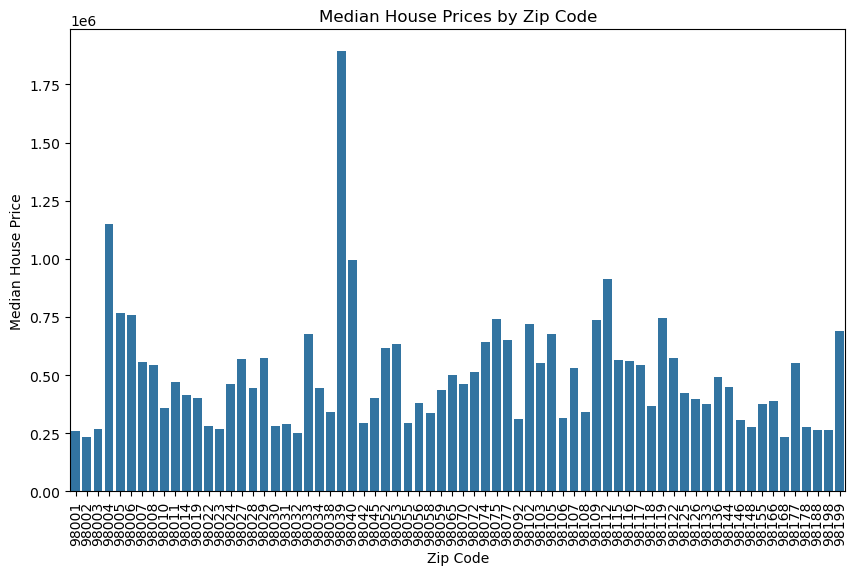

In [51]:
# Create a bar chart to visualize the median house prices
plt.figure(figsize=(10, 6))
sns.barplot(x='zipcode', y='price', data=zip_code_median_prices)
plt.title('Median House Prices by Zip Code')
plt.xlabel('Zip Code')
plt.ylabel('Median House Price')
plt.xticks(rotation=90)
plt.show()

In [53]:
# Define the features and target variable
X = housing_data[['zipcode']]
y = housing_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-Squared: {r2:.2f}')

Mean Squared Error: 149108972300.54
R-Squared: 0.00


In [69]:
# Define the hyperparameter space
param_grid = {
    'fit_intercept': [True, False]
}

# Create a linear regression model
model = LinearRegression()

# Create a standard scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

Best Hyperparameters: {'fit_intercept': True}
Best Score (MSE): 124629352788.36577


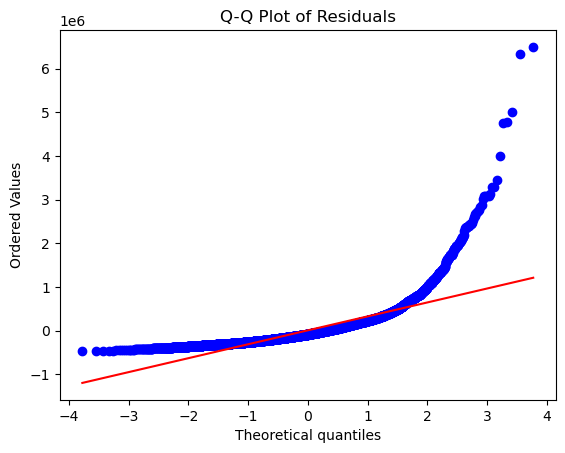

In [73]:
from scipy import stats

# Predict using the tuned model
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Plot Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

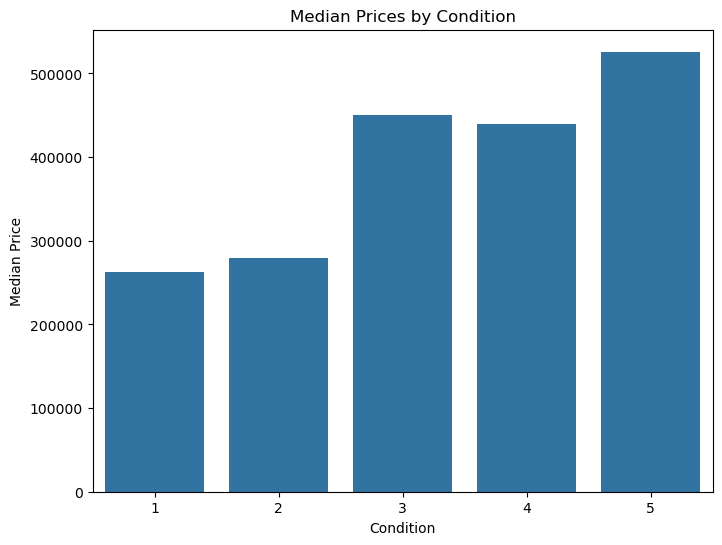

In [40]:
# Group the data by condition and calculate the median price
median_prices = housing_data.groupby('condition')['price'].median().reset_index()

# Create a bar graph
plt.figure(figsize=(8, 6))
sns.barplot(x='condition', y='price', data=median_prices)

# Set the title and labels
plt.title('Median Prices by Condition')
plt.xlabel('Condition')
plt.ylabel('Median Price')

# Show the plot
plt.show()